El  objetivo de nuestro trabajo es predecir la edad de una zarigüeya hembra a partir del tamaño de su craneo. Segun la revista de  Biologia tropical pag 313-320 "crecimiento y desarrollo  del craneo en marsupiales" Lopez R  (1997) en  mamíferos  como la zarigüeya, el craneo se desarolla a medida que el animal crece, por ejemplo, si el craneo es pequeño y menos desarollado podemos asegurar que es una zarigüeya joven, pero si por el contrario el craneo es más grande y robusto la zarigüeya esta en una etapa adulta. Aunque hay muchas formas de saber la edad de una zarigüeya a partir de sus caracteristicas fisicas, nosotros lo vamos a hacer a partir del tamaño de su craneo.

El estudio de este problema es importante, pues tiene implicaciones ecológicas y conservativas dado que al saber cuantas zarigüeya jovenes o adultas hay en cierta poblacion ayuda a los ecologistas  a comprender su estructura poblacional, su taza de  reproducción y supervivencia y es muy útil para estrategias de conservación 

Determinar la edad de una zarigüeya es una tarea dificil y solo se puede llegar a conocer a partir de sus caracteristicas fisicas y en algunas veces de su comportamiento. Una vez que la zarigüeya ha alcanzado la edad adulta, es casi imposible determinar la edad sin llevarla al veterinario. A menudo, es necesario determinar la edad de una zarigüeya abandonada para medir su probabilidad de supervivencia. 



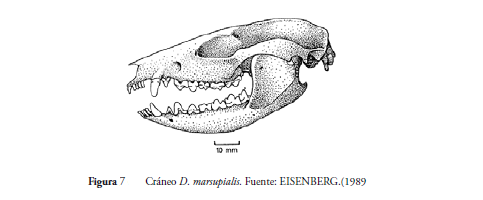


Referencias: Clayton Yuetter articulo  como " como saber la edad de una zarigüeya"

In [110]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

df = pd.read_csv('./dataset.csv')


escriba 
```
pip install pandas, seaborn, matplotlib, scikit-learn
```
en la terminal 👍🏽

In [104]:
df.sample(10)

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
85,86,6,other,f,3.0,88.2,53.2,86.5,38.5,60.3,43.7,13.6,26.0,31.0
98,99,7,other,f,3.0,93.3,56.2,86.5,38.5,64.8,43.8,14.0,28.0,35.0
58,59,4,other,m,2.0,102.5,62.8,96.0,40.0,73.2,44.5,14.7,32.0,36.0
30,31,1,Vic,m,3.0,92.8,54.1,93.0,37.0,68.0,52.5,14.5,27.0,31.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
100,101,7,other,m,1.0,88.6,54.7,82.5,39.0,64.4,48.0,14.0,25.0,33.0
76,77,6,other,m,6.0,93.6,56.2,84.0,36.0,62.8,42.9,16.2,25.0,35.0
45,46,2,Vic,m,NaN,91.4,54.4,84.0,35.0,72.8,51.2,14.4,24.5,35.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0
44,45,2,Vic,m,3.0,90.7,55.9,81.0,34.0,71.5,54.0,14.6,27.0,31.5


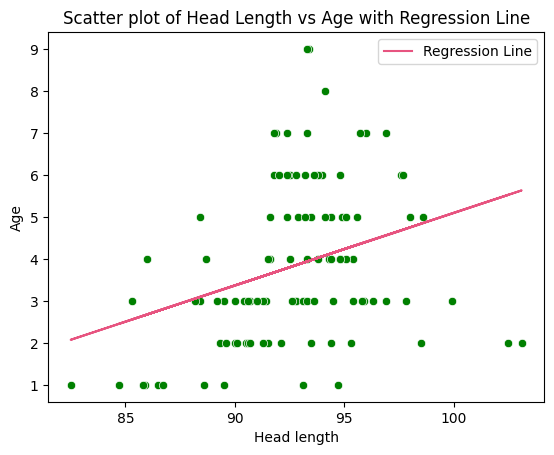

In [105]:

# Selecciona los valores de la columna 'hdlngth' y 'age'.
x = df['hdlngth'].values.reshape(-1, 1)
y = df['age']

# Elimina filas con valores NaN en 'y' (edad).
mask = ~y.isna()  # Crea una máscara booleana para identificar filas sin valores NaN y filtrar para seleccionar los que si me sirvan.
x = x[mask]       # Aplica la máscara a x para eliminar lo que no me sirve.
y = y[mask]       # Aplica la máscara a y para eliminar lo que no me sirve.

# Crea un gráfico de dispersión (scatter plot) con los valores de 'x' y 'y'. (los puntos verdes)
sns.scatterplot(x=x.flatten(), y=y, color="green")  # Se utiliza flatten() para transformar x en un vector 1D.

# Ajusta un modelo de regresión lineal.
model = LinearRegression()  # Crea una instancia del modelo de regresión lineal.
model.fit(x, y)  # Ajusta el modelo utilizando los datos x e y.

# Obtiene los valores predichos por el modelo (la línea de regresión).
y_prediccion = model.predict(x)

# Traza la línea de regresión sobre el gráfico de dispersión.
plt.plot(x, y_prediccion, color='#e75480', label='Regression Line')  # Línea rosada con una etiqueta.

# Agrega etiquetas a los ejes y un título al gráfico.
plt.xlabel('Head length')  # Etiqueta del eje x (puedes personalizar el texto según tu contexto).
plt.ylabel('Age')  # Etiqueta del eje y.
plt.title('Scatter plot of Head Length vs Age with Regression Line')  # Título del gráfico.

# Muestra la parte explicativa en el gráfico (opcional, útil si tienes múltiples líneas o datos adicionales).
plt.legend()

# Muestra el gráfico final en pantalla.
plt.show()


Tener en cuenta que los datos que me arroja el dataset esta en mm. Se recomienda poner la longitud del craneo alrededor de 74 mm dado que  segun los datos este es el craneo mas pequeño que corresponde al  de una zarigüeya bebe 

In [106]:
mse = ((y - y_prediccion) ** 2).mean() #error cuadratico medio 


print(mse) 


3.242122384121844


In [108]:
print(model.predict([[74]]))  #predicción de edad dado un tamaño, según el modelo de regresión

[0.60636741]


In [109]:
print(x)

[[ 94.1]
 [ 92.5]
 [ 94. ]
 [ 93.2]
 [ 91.5]
 [ 93.1]
 [ 95.3]
 [ 94.8]
 [ 93.4]
 [ 91.8]
 [ 93.3]
 [ 94.9]
 [ 95.1]
 [ 95.4]
 [ 92.9]
 [ 91.6]
 [ 94.7]
 [ 93.5]
 [ 94.4]
 [ 94.8]
 [ 95.9]
 [ 96.3]
 [ 92.5]
 [ 94.4]
 [ 95.8]
 [ 96. ]
 [ 90.5]
 [ 93.8]
 [ 92.8]
 [ 92.1]
 [ 92.8]
 [ 94.3]
 [ 91.4]
 [ 90.6]
 [ 94.4]
 [ 93.3]
 [ 89.3]
 [ 92.4]
 [ 84.7]
 [ 91. ]
 [ 88.4]
 [ 85.3]
 [ 90. ]
 [ 90.7]
 [ 90.1]
 [ 98.6]
 [ 95.4]
 [ 91.6]
 [ 95.6]
 [ 97.6]
 [ 93.1]
 [ 96.9]
 [103.1]
 [ 99.9]
 [ 95.1]
 [ 94.5]
 [102.5]
 [ 91.3]
 [ 95.7]
 [ 91.3]
 [ 92. ]
 [ 96.9]
 [ 93.5]
 [ 90.4]
 [ 93.3]
 [ 94.1]
 [ 98. ]
 [ 91.9]
 [ 92.8]
 [ 85.9]
 [ 82.5]
 [ 88.7]
 [ 93.8]
 [ 92.4]
 [ 93.6]
 [ 86.5]
 [ 85.8]
 [ 86.7]
 [ 90.6]
 [ 86. ]
 [ 90. ]
 [ 88.4]
 [ 89.5]
 [ 88.2]
 [ 98.5]
 [ 89.6]
 [ 97.7]
 [ 92.6]
 [ 97.8]
 [ 90.7]
 [ 89.2]
 [ 91.8]
 [ 91.6]
 [ 94.8]
 [ 91. ]
 [ 93.2]
 [ 93.3]
 [ 89.5]
 [ 88.6]
 [ 92.4]
 [ 91.5]
 [ 93.6]]
